In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokmon-combat-power-prediction/pokemon.csv


# **Import**

In [151]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [152]:
df = pd.read_csv('/kaggle/input/pokmon-combat-power-prediction/pokemon.csv')

* **Name: Name of the Pokémon.**
* **Type 1: Primary type of the Pokémon (e.g., Grass, Fire, Water, etc.).**
* **Type 2: Secondary type of the Pokémon, if any.**
* **Total: Total combat power of the Pokémon.**
* **HP: Hit Points, indicating the Pokémon's health.**
* **Attack: Attack power of the Pokémon.**
* **Defense: Defensive power of the Pokémon.**
* **Sp. Atk: Special Attack power of the Pokémon.**
* **Sp. Def: Special Defense power of the Pokémon.**
* **Speed: Speed attribute of the Pokémon.**
* **Generation: Generation of the Pokémon.**
* **Legendary: Whether the Pokémon is legendary or not.**

In [153]:
df.shape

(151, 12)

In [154]:
df.describe()

,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,69.000000,1.0
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.935726,0.0
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.0
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.0
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,1.0
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000,1.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          151 non-null    object
 1   Type 1        151 non-null    object
 2   Type 2        67 non-null     object
 3   Combat Power  151 non-null    int64 
 4   HP            151 non-null    int64 
 5   Attack        151 non-null    int64 
 6   Defense       151 non-null    int64 
 7   Sp. Atk       151 non-null    int64 
 8   Sp. Def       151 non-null    int64 
 9   Speed         151 non-null    int64 
 10  Generation    151 non-null    int64 
 11  Legendary     151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 13.2+ KB


**Missing Value Check**

In [156]:
df.isnull().sum()

Name             0
Type 1           0
Type 2          84
Combat Power     0
HP               0
Attack           0
Defense          0
Sp. Atk          0
Sp. Def          0
Speed            0
Generation       0
Legendary        0
dtype: int64

**Duplicated value check**

In [157]:
df.duplicated().sum()

0

In [158]:
df.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


# **2. Data Transform**

In [159]:
df['Legendary'] = df['Legendary'].map({True: 1, False: 0})

**Data Check**

In [160]:
df.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0


# **3. Data Visualization**

In [161]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

**Histogram**

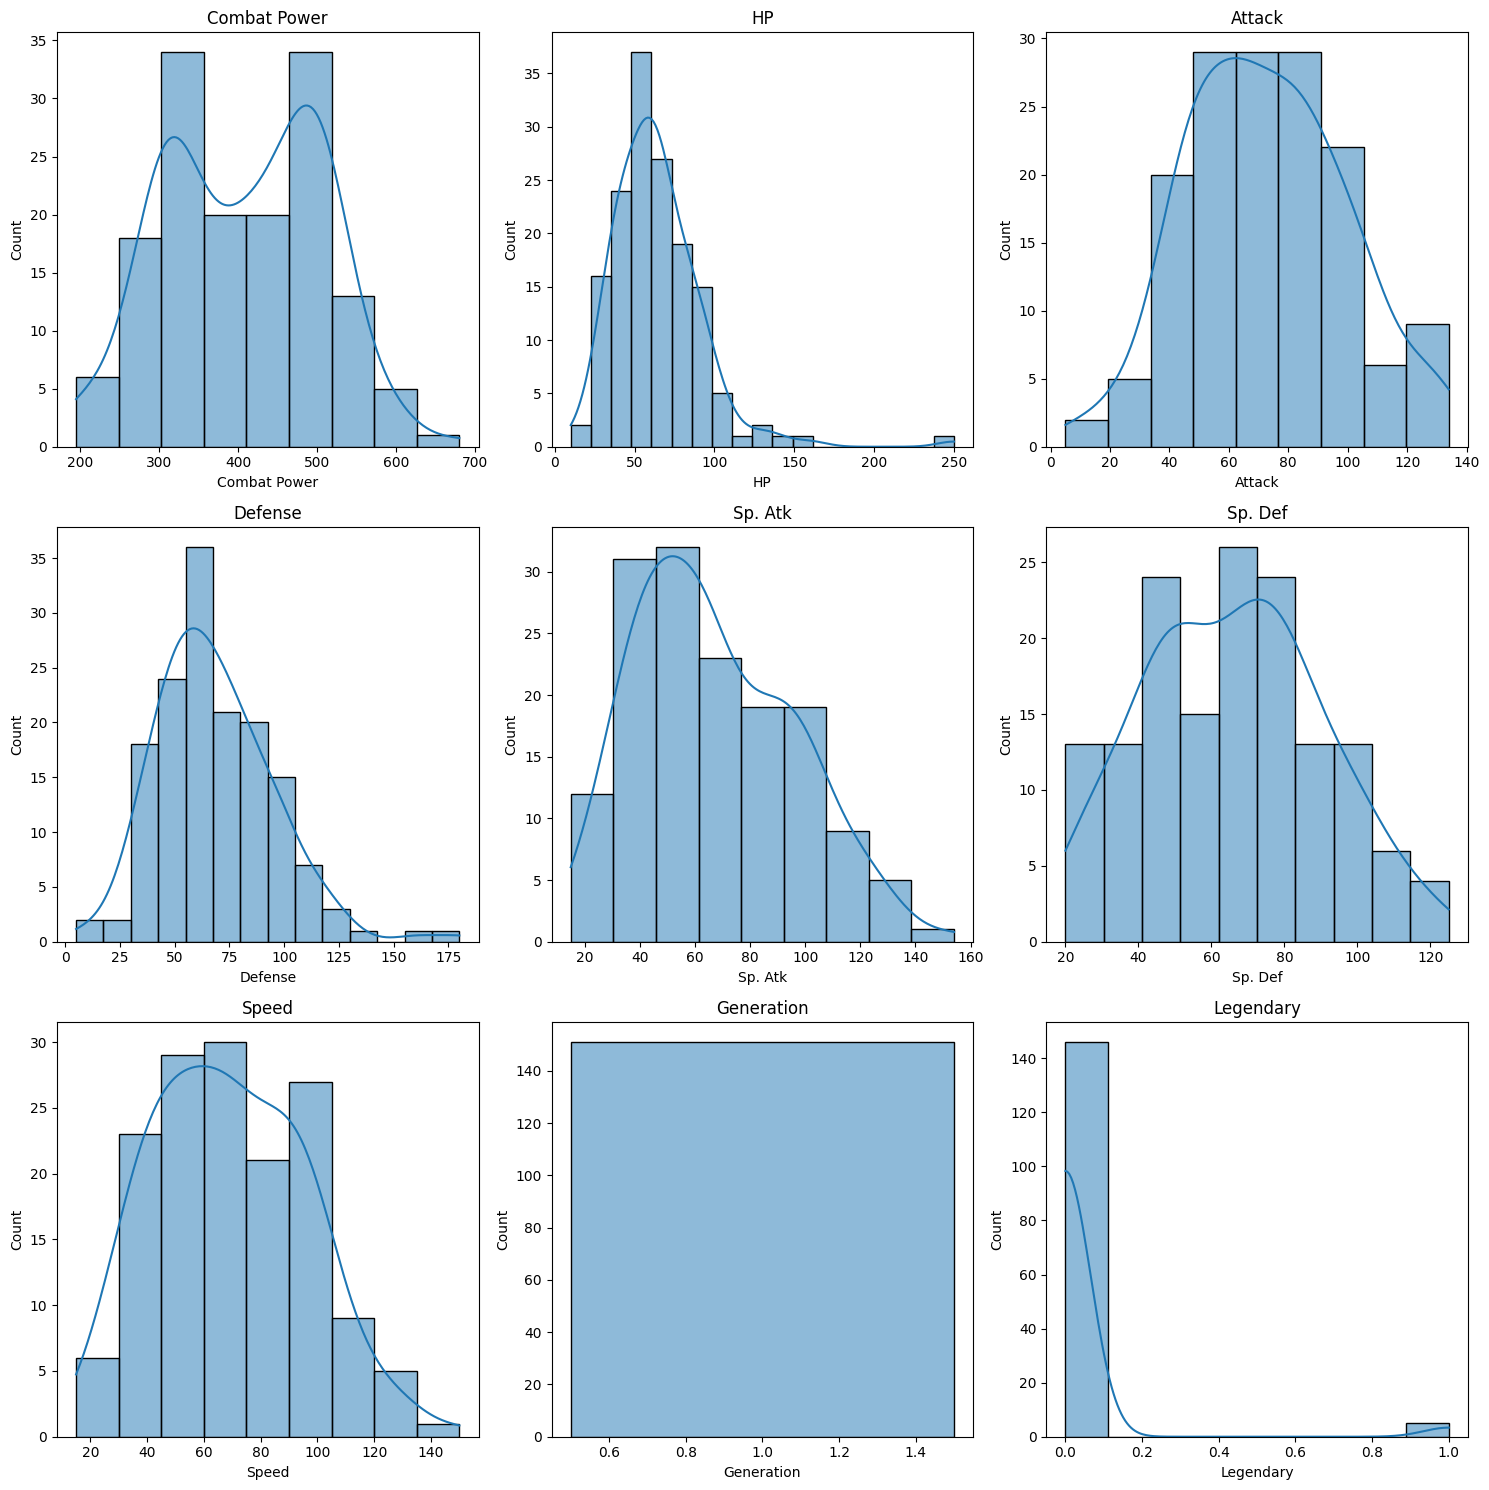

In [162]:
f, ax = plt.subplots(3,3 , figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

**Legendary Pokémon vs Ordinary Pokémon** 

* **Legendary Pokémon Average Attack**

In [163]:
Legendary = df.groupby(['Legendary'])['Attack'].mean().reset_index()

In [164]:
Legendary

,Legendary,Attack
0,0,71.712329
1,1,97.000000


In [165]:
px.bar(Legendary, x = 'Legendary' ,y='Attack', text_auto = True, title = 'Legendary Pokémon Average Attack(1: Legendary)', template='plotly_dark')

* **Legendary Pokémon Average HP**

In [166]:
Legendary_Hp = df.groupby(['Legendary'])['HP'].mean().reset_index()

In [167]:
Legendary_Hp

,Legendary,HP
0,0,63.150685
1,1,95.200000


In [168]:
px.bar(Legendary_Hp, x = 'Legendary' ,y='HP', text_auto = True, title = 'Legendary Pokémon Average HP(1: Legendary)', template='plotly_dark')

* **Legendary Pokémon Average Defense**

In [169]:
Legendary_Def = df.groupby(['Legendary'])['Defense'].mean().reset_index()

In [170]:
Legendary_Def

,Legendary,Defense
0,0,67.376712
1,1,93.000000


In [171]:
px.bar(Legendary_Def, x = 'Legendary' ,y='Defense', text_auto = True, title = 'Legendary Pokémon Average Defense(1: Legendary)', template='plotly_dark')

* **Legendary Pokémon Average Speed**

In [172]:
Legendary_Spe = df.groupby(['Legendary'])['Speed'].mean().reset_index()

In [173]:
Legendary_Spe

,Legendary,Speed
0,0,67.90411
1,1,101.00000


In [174]:
px.bar(Legendary_Spe, x = 'Legendary' ,y='Speed', text_auto = True, title = 'Legendary Pokémon Average Speed(1: Legendary)', template='plotly_dark')

* **Legendary Pokémon Average Sp.Atk**

In [175]:
Legendary_Spatk = df.groupby(['Legendary'])['Sp. Atk'].mean().reset_index()

In [176]:
Legendary_Spatk

,Legendary,Sp. Atk
0,0,65.335616
1,1,119.800000


In [177]:
px.bar(Legendary_Spatk, x = 'Legendary' ,y='Sp. Atk', text_auto = True, title = 'Legendary Pokémon Average Sp. Atk(1: Legendary)', template='plotly')

* **Legendary Pokémon Average Sp. Def**

In [178]:
Legendary_Spdef = df.groupby(['Legendary'])['Sp. Def'].mean().reset_index()

In [179]:
Legendary_Spdef

,Legendary,Sp. Def
0,0,64.924658
1,1,98.000000


In [180]:
px.bar(Legendary_Spdef, x = 'Legendary' ,y='Sp. Def', text_auto = True, title = 'Legendary Pokémon Average Sp. Def(1: Legendary)', template='plotly')

* **Legendary Pokémon Average Combat Power**

In [181]:
Legendary_Cp = df.groupby(['Legendary'])['Combat Power'].mean().reset_index()

In [182]:
Legendary_Cp

,Legendary,Combat Power
0,0,400.335616
1,1,604.000000


In [183]:
px.bar(Legendary_Cp, x = 'Legendary' ,y='Combat Power', text_auto = True, title = 'Legendary Pokémon Average Combat Power(1: Legendary)', template='plotly')

--------

* **Legendary Pokémon Total Combat Power Comparison**

In [184]:
Legendary_combat_top5 = df[df['Legendary'] == 1].sort_values(by = 'Combat Power' , ascending = False)

In [185]:
Legendary_combat_top5 = Legendary_combat_top5[['Name','Combat Power']]

In [186]:
Legendary_combat_top5 

,Name,Combat Power
149,Mewtwo,680
150,Mew,600
143,Articuno,580
144,Zapdos,580
145,Moltres,580


In [187]:
px.bar(Legendary_combat_top5 , y = 'Name' ,x='Combat Power', text_auto = True, title = 'Legendary Pokémon Total Combat Power Comparison', template='plotly')

* **Compare normal Pokémon Top 5 total combat power**

In [188]:
normal_combat_top5 = df[df['Legendary'] == 0].sort_values(by = 'Combat Power' , ascending = False)

In [189]:
normal_combat_top5 = normal_combat_top5[['Name','Combat Power']]

In [190]:
normal_combat_top5

,Name,Combat Power
148,Dragonite,600
58,Arcanine,555
142,Snorlax,540
129,Gyarados,540
130,Lapras,535
...,...,...
13,Kakuna,205
10,Metapod,205
128,Magikarp,200
12,Weedle,195


In [191]:
px.bar(normal_combat_top5[0:5] , y = 'Name' ,x='Combat Power', text_auto = True, title = 'Normal Pokémon Top 5 Total Combat Power Comparison', template='plotly')

**Correlation**

In [192]:
num_cols = df.select_dtypes(include = ['int64','float64'])
num_cols = num_cols.columns

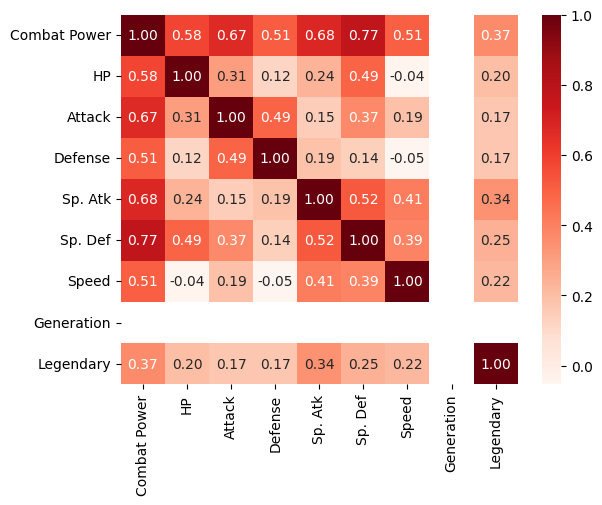

In [193]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

-------

# **4. Modeling**

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [195]:
df.drop(columns = {'Name','Type 2'}, axis = 1,inplace = True)

In [196]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [197]:
x= df.drop(['Legendary'],axis=1)
y= df['Legendary']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [199]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, lgr, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.00      0.00      0.00         1

    accuracy                           0.97        31
   macro avg       0.48      0.50      0.49        31
weighted avg       0.94      0.97      0.95        31



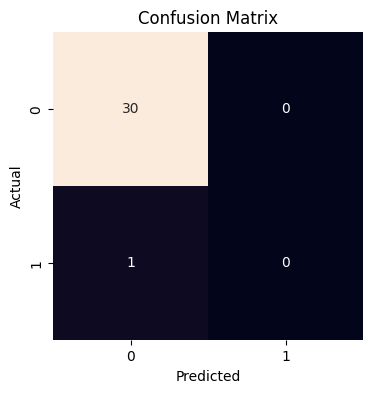

--------------------------------------------------
Support Vector Machine accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.00      0.00      0.00         1

    accuracy                           0.97        31
   macro avg       0.48      0.50      0.49        31
weighted avg       0.94      0.97      0.95        31



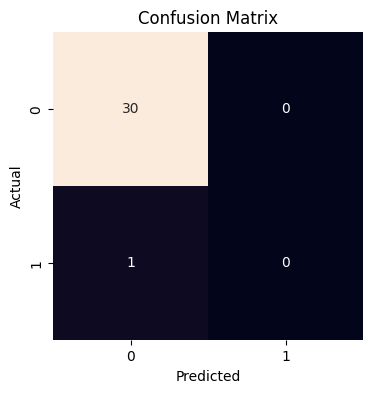

--------------------------------------------------
Ada Boost accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.00      0.00      0.00         1

    accuracy                           0.97        31
   macro avg       0.48      0.50      0.49        31
weighted avg       0.94      0.97      0.95        31



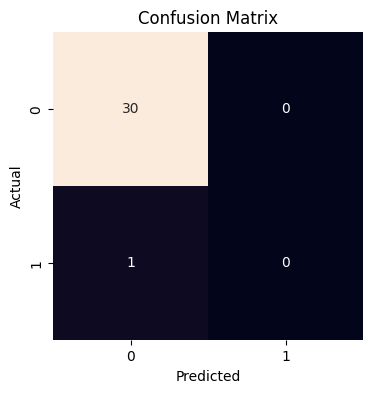

--------------------------------------------------
Gradient Boostng accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         1

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



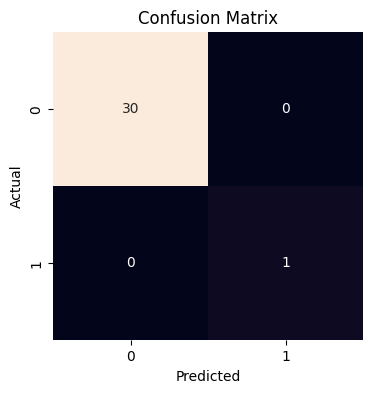

--------------------------------------------------
Logistic Regression accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.00      0.00      0.00         1

    accuracy                           0.97        31
   macro avg       0.48      0.50      0.49        31
weighted avg       0.94      0.97      0.95        31



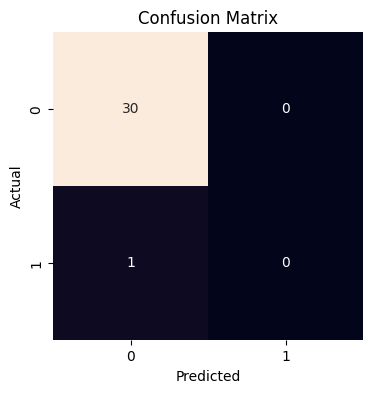

--------------------------------------------------
XGBoost accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         1

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



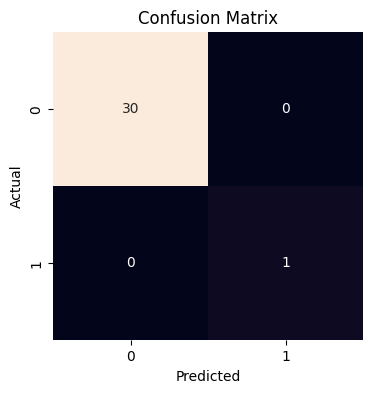

--------------------------------------------------


In [200]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

# **5. Evaluation**

In [201]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100

In [202]:
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

**Please leave your advice in the comments. Thank you**